In [1]:
#import library yang dibutuhkan
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceCalculator
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
#membaca file fasta yang telah di download
apoeAcipenser = list(SeqIO.parse("APOE-Acipenser.fasta", "fasta"))
apoeBos = list(SeqIO.parse("APOE-Bos.fasta", "fasta"))
apoeCercopithecus = list(SeqIO.parse("APOE-Cercopithecus.fasta", "fasta"))
apoeOryctolagus = list(SeqIO.parse("APOE-Oryctolagus.fasta", "fasta"))
apoePan = list(SeqIO.parse("APOE-Pan.fasta", "fasta"))
apoeSiniperca = list(SeqIO.parse("APOE-Siniperca.fasta", "fasta"))

In [3]:
#potong sequence dengan panjang paling APOE paling pendek
#hal ini dilakukan agar dapat dilakukan multiple sequence alignment
seqapoeAcipenser = apoeAcipenser[0].seq[:138]
seqapoeBos = apoeBos[0].seq[:138]
seqapoECercopithecus = apoeCercopithecus[0].seq[:138]
seqapoeOryctolagus= apoeOryctolagus[0].seq[:138]
seqapoePan = apoePan[0].seq[:138]
seqapoESiniperca = apoeSiniperca[0].seq[:138]


In [4]:
#membuat multiple sequence alignment
sequences = [
    SeqRecord(seqapoeAcipenser,id = 'Acipenser'),
    SeqRecord(seqapoeBos,id = 'Bos Taurus'),
    SeqRecord(seqapoECercopithecus,id = 'Cercoptithecus'),
    SeqRecord(seqapoeOryctolagus,id = 'Oryctolagus'),
    SeqRecord(seqapoePan,id = 'Pan troglodytes'),
    SeqRecord(seqapoESiniperca,id = 'Siniperca')  
]

In [5]:
# Membuat fungsi hamming distance
def hamming_distance(seq1, seq2):
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

In [6]:
#membuat matriks hamming distance
num_sequences = len(sequences)
hamming_matrix = np.zeros((num_sequences, num_sequences), dtype=int)

In [7]:
#mengisi matriks hamming distance
for i in range(num_sequences):
    for j in range(num_sequences):
        hamming_matrix[i, j] = hamming_distance(sequences[i].seq, sequences[j].seq)

In [8]:
# Mengonversi matriks menjadi DataFrame agar lebih rapi
sequence_ids = [seq.id for seq in sequences]
hamming_df = pd.DataFrame(hamming_matrix, index=sequence_ids, columns=sequence_ids)
# Menggunakan tabulate untuk mem print DataFrame dalam format tabel
table = tabulate(hamming_df, headers='keys', tablefmt='grid')

In [9]:
# Mencetak matriks Hamming distance
print("Matriks Hamming Distance:")
print(table)

Matriks Hamming Distance:
+-----------------+-------------+--------------+------------------+---------------+-------------------+-------------+
|                 |   Acipenser |   Bos Taurus |   Cercoptithecus |   Oryctolagus |   Pan troglodytes |   Siniperca |
+=================+=============+==============+==================+===============+===================+=============+
| Acipenser       |           0 |           99 |              101 |            94 |               103 |         102 |
+-----------------+-------------+--------------+------------------+---------------+-------------------+-------------+
| Bos Taurus      |          99 |            0 |              111 |            99 |                99 |          96 |
+-----------------+-------------+--------------+------------------+---------------+-------------------+-------------+
| Cercoptithecus  |         101 |          111 |                0 |           105 |               103 |         111 |
+-----------------+-----------

In [10]:
# Buat dendrogram
align = MultipleSeqAlignment(sequences)
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(align)


/var/folders/yf/pwm2z7cs7m39fl6g70nggc0r0000gn/T/ipykernel_4506/2596667190.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dm_matrix, method='average')


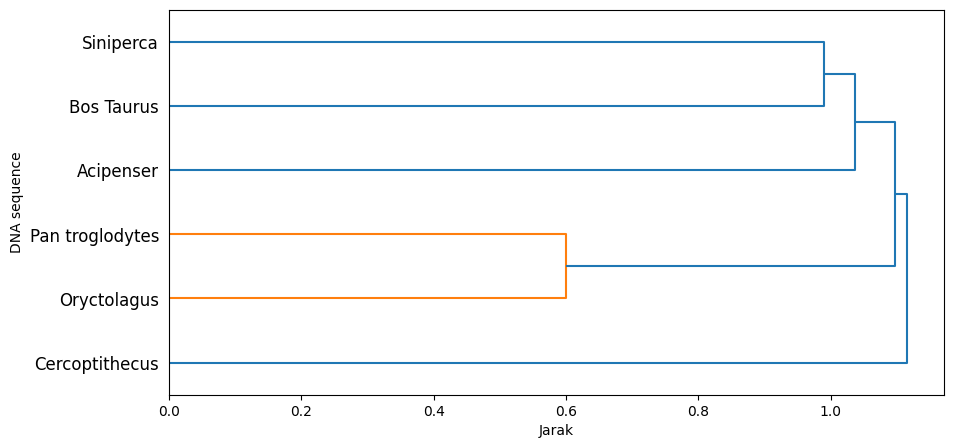

In [11]:

# Membuat matriks Hamming
num_sequences = len(sequences)
hamming_matrix = np.zeros((num_sequences, num_sequences), dtype=int)
sequence_ids = [seq.id for seq in sequences]
hamming_df = pd.DataFrame(hamming_matrix, index=sequence_ids, columns=sequence_ids)

# Menghitung matriks jarak
dm_matrix = np.array(dm)
linkage_matrix = linkage(dm_matrix, method='average')

# Membuat plot dendrogram
fig, ax = plt.subplots(figsize=(10, 5))
dendrogram(linkage_matrix, labels=sequence_ids, orientation='right', ax=ax)

# Menyesuaikan plot
plt.xlabel('Jarak')
plt.ylabel('DNA sequence')
plt.show()
